<div>
    <img style="float:right;" src="images/smi-logo.png"/>
    <div style="float:left;color:#58288C;"><h1>Datenanalyse und Datenmanagement</h1></div>
</div>

---
# Notebook IVa: Analytics Exercise
In diesem Notebook entwickelst du ein eigenes analytiches Modell.
Zunächst sind die erforderlichen Module zu importieren.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.datasets
import sklearn.model_selection
import sklearn.tree

%matplotlib inline
%load_ext sql

## 1. Einstieg: Research Approach <a id="kapitel1"/>

- **Business Problem**: Für Immobilieninvestments ist eine einfache Vorhersage des möglichen Ertrags einer Immobilie erforderlich.
- **Research Problem**: Ein Modell soll ausgehend von Haus- und Umgebungsdaten (Häuserblock) den Kaufpreis einer Immobilie vorhersagen.
- **Trainingsdaten**: 
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude
        - MedHouseVal   average value of houses in block (5 classes)

## 2. Datenaufbereitung <a id="kapitel2"/>

### 2.1. Daten einlesen

Die Daten erhälst du in voraufbereiteter Form aus den Beispieldatensätzen von Scikit-Learn:

In [66]:
data = sklearn.datasets.fetch_california_housing(as_frame=True)
df = data.frame

Untersuche das DataFrame mit ```.head()``` und sieh dir die deskriptiven Statistiken an.

Entferne die Merkmale Latitude und Longitude.

### 2.2. Feature Engineering

#### 2.2.1. Visualisieren der Merkmale

Sie dir die Histogramme zur Zielvariablen MedHouseVal an! Was fällt auf?

#### 2.2.2. - 2.2.4. Zusammenstellen der Trainingsdaten

Die Daten sind bereits aufbereitet. Übernimm die Merkmale für den Modell-Input in ein DataFrame X und das Zielmerkmal ```MedHouseVal``` in ein DataFrame y.

## 3. Modellbildung <a id="kapitel3"/>
Unterteile den Datensatz in 80% Trainingsdaten und 20% Testdaten.  
Erzeuge einen Decision Tree zur Prognose des Immobilienwerts mit mindestens 1000 Immobilien pro Knoten.

In [85]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

In [91]:
tree = sklearn.tree.DecisionTreeRegressor(min_samples_leaf = 1000)
# ...

DecisionTreeRegressor(min_samples_leaf=1000)

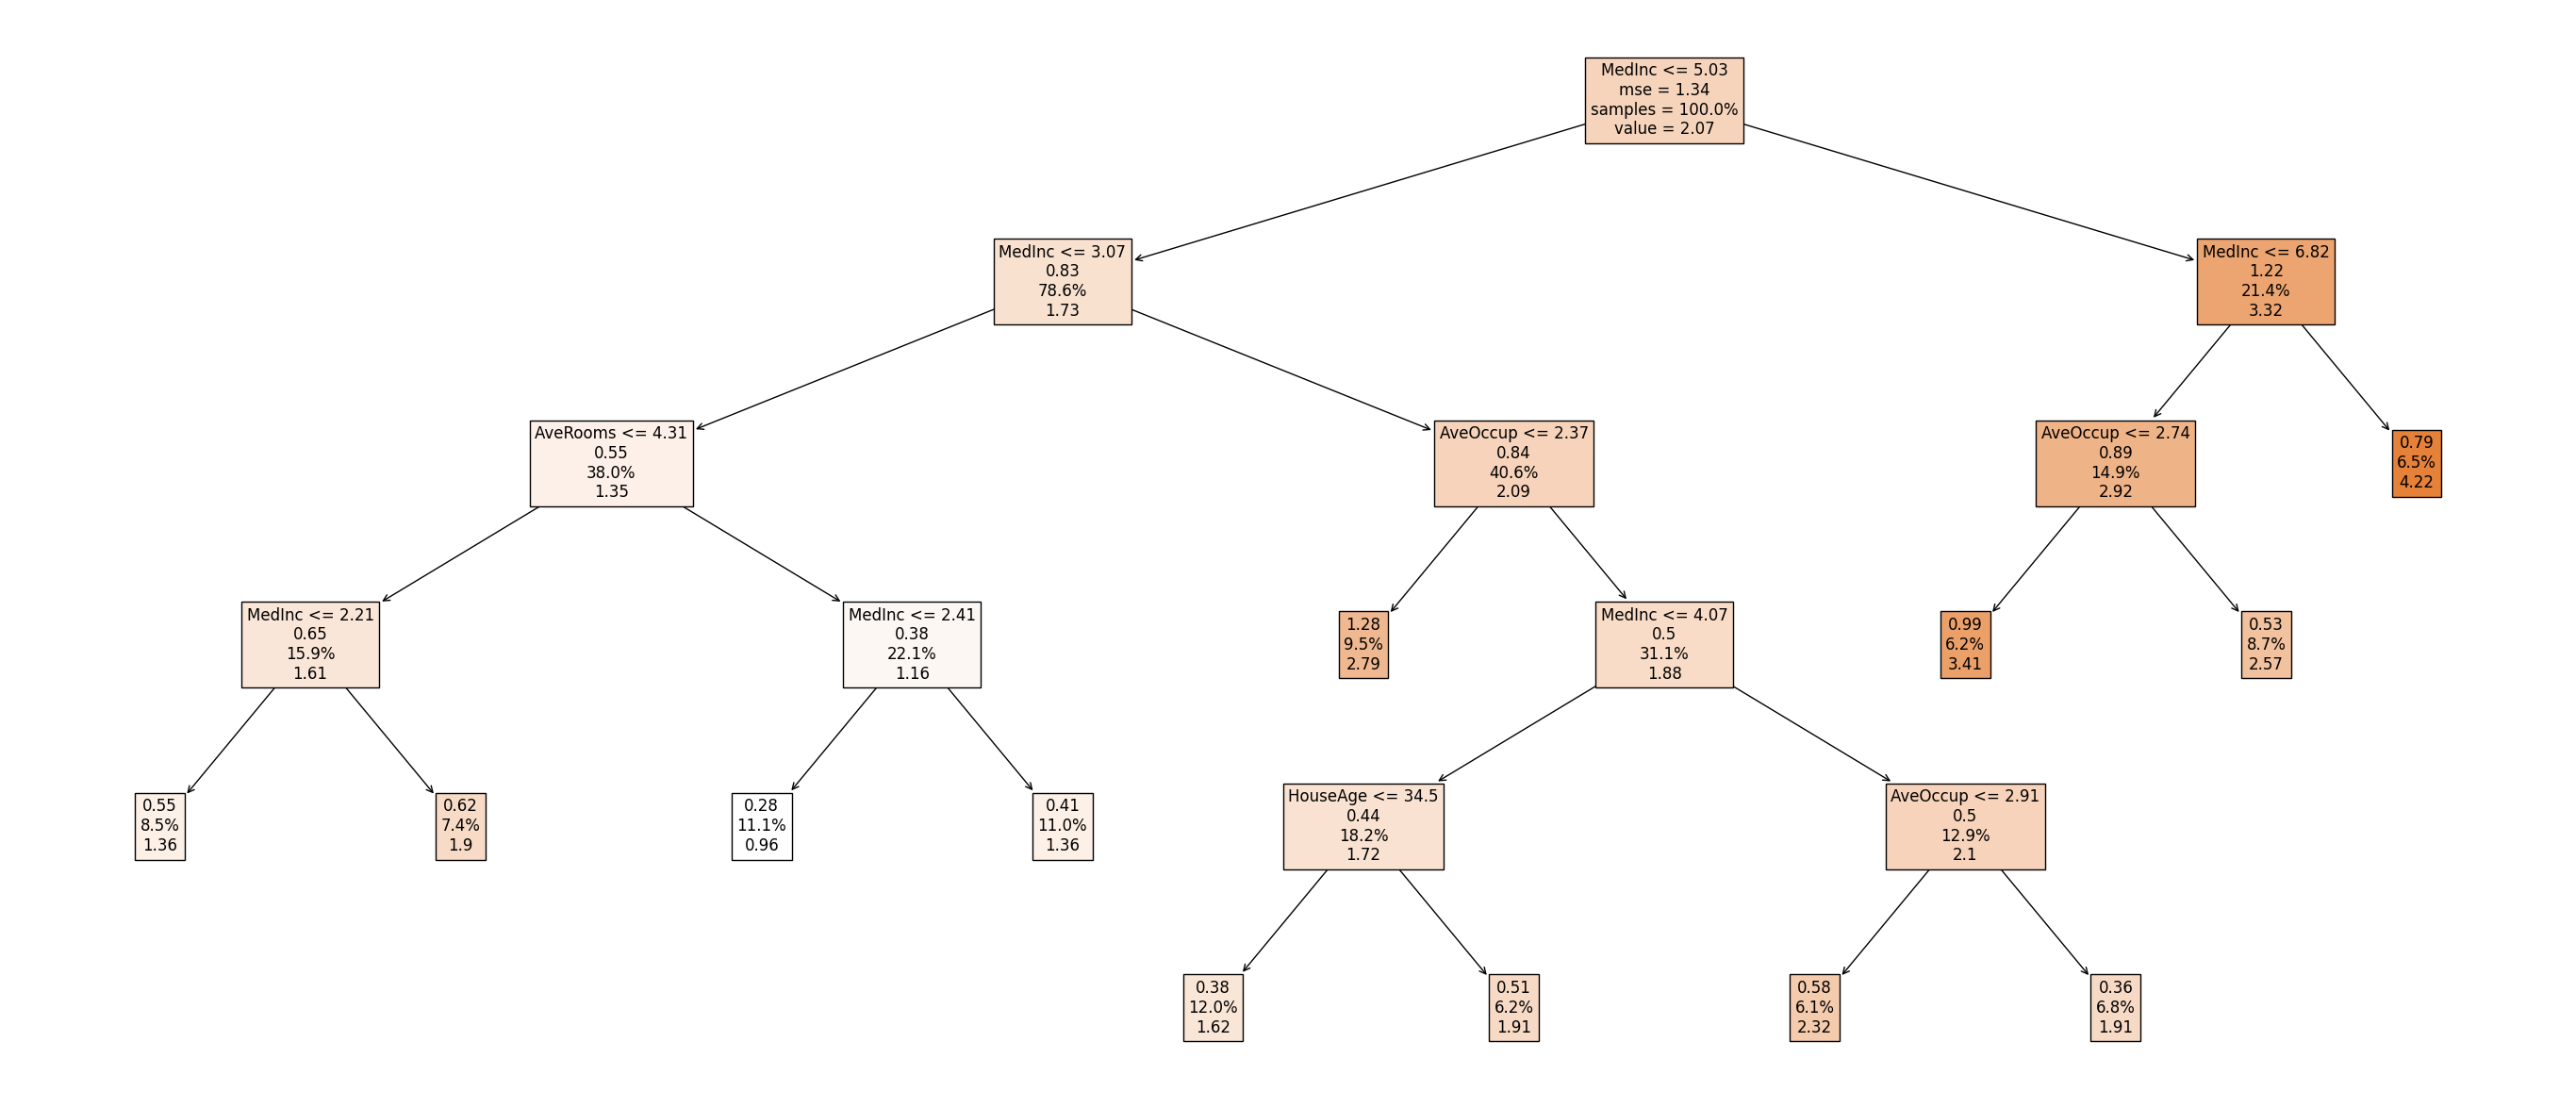

In [93]:
fig, ax = plt.subplots(1,1,figsize=(35,15))
t = sklearn.tree.plot_tree(tree, ax=ax, class_names=True, label="root", precision=2, feature_names=X.columns, fontsize=12, proportion=True, filled=True)
plt.show()

## 4. Modellevaluation <a id="kapitel"/>

Berechne die Average Precision für Trainings- und Testdaten!

Inspiziere die Prognosegüte mit einem Prognose/Ist-Vergleich in einem Scatterplot (```sns.scatterplot (x= ..., y= ...)```) genauer!

Was fällt hinsichtlich des Modellfehlers auf?